In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/IS403.N22/Project/dataset/NFLX_Stock.csv',usecols=['Date', 'Price'])
df

,Date,Price
0,12/01/2017,186.82
1,12/04/2017,184.04
2,12/05/2017,184.21
3,12/06/2017,185.30
4,12/07/2017,185.20
...,...,...
1387,06/08/2023,409.37
1388,06/09/2023,420.02
1389,06/12/2023,423.97
1390,06/13/2023,435.73


In [ ]:
df1 = df[['Price']]
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

In [ ]:
choose = 3
# 7:2:1
if choose == 1:
  train_size = int(0.7 * len(df1))
  test_size = int(0.2 * len(df1))
  val_size = len(df) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size]
  val_data = df1[train_size+test_size:]

# 5:3:2
elif choose == 2:
  train_size = int(0.5 * len(df1))
  test_size = int(0.3 * len(df1))
  val_size = len(df) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size]
  val_data = df1[train_size+test_size:]

# 6:2:2
elif choose == 3:
  train_size = int(0.6 * len(df1))
  test_size = int(0.2 * len(df1))
  val_size = len(df) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size]
  val_data = df1[train_size+test_size:]

print("Train: ", train_size)
print("Test: ", test_size)
print("Val: ", val_size)

Train:  835
Test:  278
Val:  279


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.5 MB/s eta 0:00:00


In [ ]:
train = np.array(train_data).reshape(-1,1)
test = np.array(test_data).reshape(-1,1)
val = np.array(val_data).reshape(-1,1)

In [ ]:

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6267.241, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6257.657, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6258.104, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6266.440, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6259.444, Time=0.47 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6256.340, Time=0.95 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6256.727, Time=2.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6256.552, Time=1.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6259.645, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6255.682, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6257.642, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6257.170, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=6256.172, Time=0.65 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price']).reshape(-1,1)
test_pred = model.predict(n_periods=len(y_test)).reshape(-1,1)


x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price']).reshape(-1,1)
val_pred =  model.predict(n_periods=len(y_val)).reshape(-1,1)


In [ ]:
def mae_rmse_mape(true, predict):
  mae = mean_absolute_error(true, predict)
  rmse = np.sqrt(mean_squared_error(true, predict))
  mape = mean_absolute_percentage_error(true, predict)

  return mae, rmse, mape

In [ ]:

mae_test, rmse_test, mape_test = mae_rmse_mape(y_test, test_pred)

mae_val, rmse_val, mape_val = mae_rmse_mape(y_val, val_pred)

print('MAE of Test: ', mae_test)
print('RMSE of Test: ', rmse_test)
print('MAPE of Test: ', mape_test)
print('------------------------')
print('MAE of Validation: ', mae_val)
print('RMSE of Validation: ', rmse_val)
print('MAPE of Validation: ', mape_val)

MAE of Test:  85.03467988397405
RMSE of Test:  111.71981494246309
MAPE of Test:  0.21041960654120434
------------------------
MAE of Validation:  235.2648121715615
RMSE of Validation:  244.16782507312809
MAPE of Validation:  0.9575137648058047


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
from datetime import datetime, timedelta

end_date = datetime(2023, 5, 20)
date_list = [end_date - timedelta(days=i-1) for i in range(30)]
next30days = pd.DataFrame({'date': date_list}).sort_values(by='date', ascending=True).reset_index(drop=True)
next30days['date'] = pd.to_datetime(next30days['date'])

y_next_30_days = model.predict(n_periods=30).reshape(-1,1)

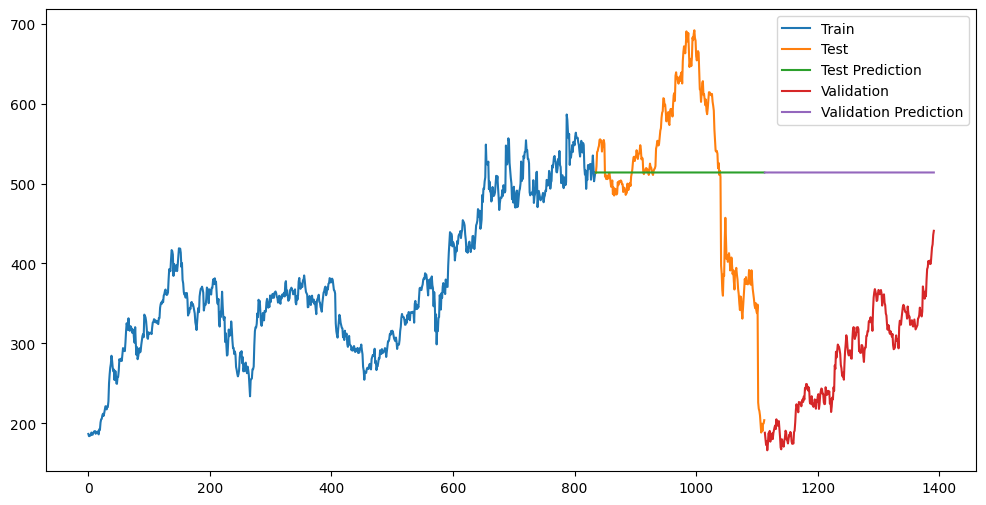

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(range(len(train)), train, label='Train')

plt.plot(range(len(train), len(train) + len(test)), test, label='Test')
plt.plot(range(len(train), len(train) + len(test)), test_pred, label='Test Prediction')

plt.plot(range(len(train) + len(test), len(train) + len(test) + len(val)), val, label='Validation')
plt.plot(range(len(train) + len(test), len(train) + len(test) + len(val)), val_pred, label='Validation Prediction')

#plt.plot(range(len(train) + len(test) + len(val), len(train) + len(test) + len(val) + 30), y_next_30_days, label='30days_Next')

plt.legend()
plt.show()

In [ ]:

# plt.figure(figsize=(12,6))

# plt.plot(df['Date'][:train_size],train, label='Train')

# plt.plot(df['Date'][train_size:train_size+test_size],test, label='Test')
# plt.plot(df['Date'][train_size:train_size+test_size],test_pred, label='Test prediction')

# plt.plot(df['Date'][train_size+test_size:],val, label='Validation')
# plt.plot(df['Date'][train_size+test_size:],val_pred, label='Validation prediction')

# plt.plot(next30days['date'],y_next_30_days, label='30 next days')

# plt.legend()
# plt.show